### 1. IMPORT LIBRARY

In [30]:
# Import the necessary packages used in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import IPython.display as display
url = 'https://raw.githubusercontent.com/Breakrule/database/master/dataFifa.csv'
# Any results you write to the current directory are saved as output.

**Read the dataset and save it to variable 'datafr'

In [31]:
#datafr = pd.read_csv("../input/dataFifa.csv", error_bad_lines=False)
datafr = pd.read_csv(url, error_bad_lines=False)

**Display the structure of the dataset

In [32]:
print(datafr.head(10))

   Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   
5           5  183277          E. Hazard   27   
6           6  177003          L. ModriÄ   32   
7           7  176580          L. SuÃ¡rez   31   
8           8  155862       Sergio Ramos   32   
9           9  200389           J. Oblak   25   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
5  https://cdn.sofifa.org/players/4/19/183277.png     Belgium   
6  

**Identifying the shape of the dataset

In [33]:
# Dimension of the datatset
print("Dimension of the dataset is: ",datafr.shape)

Dimension of the dataset is:  (18207, 89)


**Missing values for each attribute

In [34]:
# Check the missing values in the column
datafr.isnull().sum().sort_values(ascending=False)

Loaned From             16943
LWB                      2085
LM                       2085
CB                       2085
LCB                      2085
LB                       2085
RWB                      2085
RDM                      2085
CDM                      2085
LDM                      2085
RM                       2085
RCM                      2085
CM                       2085
LCM                      2085
RAM                      2085
RB                       2085
CAM                      2085
LAM                      2085
RW                       2085
RF                       2085
CF                       2085
LF                       2085
LW                       2085
RS                       2085
ST                       2085
LS                       2085
RCB                      2085
Release Clause           1564
Joined                   1553
Contract Valid Until      289
                        ...  
Positioning                48
FKAccuracy                 48
LongPassin

**Above stats shows that there are a lot of empty values and this large number can not be filled, so dropping the most empty columns woud help**

In [35]:
datafr.drop(['Loaned From'], 1, inplace=True) #axis=1 represents the column
# datafr.drop('Loaned From', axis=1)
# Dropped the column 'Loaned From' as it has 93% of missing data, thus not suitable for our evaluation**

### 2. Visualization
**A. Relationship b/w Jersey Number and Overall 

In [62]:
plt.figure(figsize=(12,10))
ax = sns.scatterplot(x="Jersey Number", y="Overall", hue ="Overall", size= "Overall", data=datafr)
ax.set_title('Scatter plot of Jersey Number vs Overall', fontsize=16)
sns.set_context("paper", font_scale=1.4)
plt.show()

# This relationship is not clear, as player's jersey number is associated more with size of club 
# and their importance of role or position. 
# Thus we won't be using Jersey Number as our feature.**

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


AttributeError: 'module' object has no attribute 'scatterplot'

**B. Ratio of players by Nationality

In [63]:
datafr['Nationality'].value_counts()[:10]

England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: Nationality, dtype: int64

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


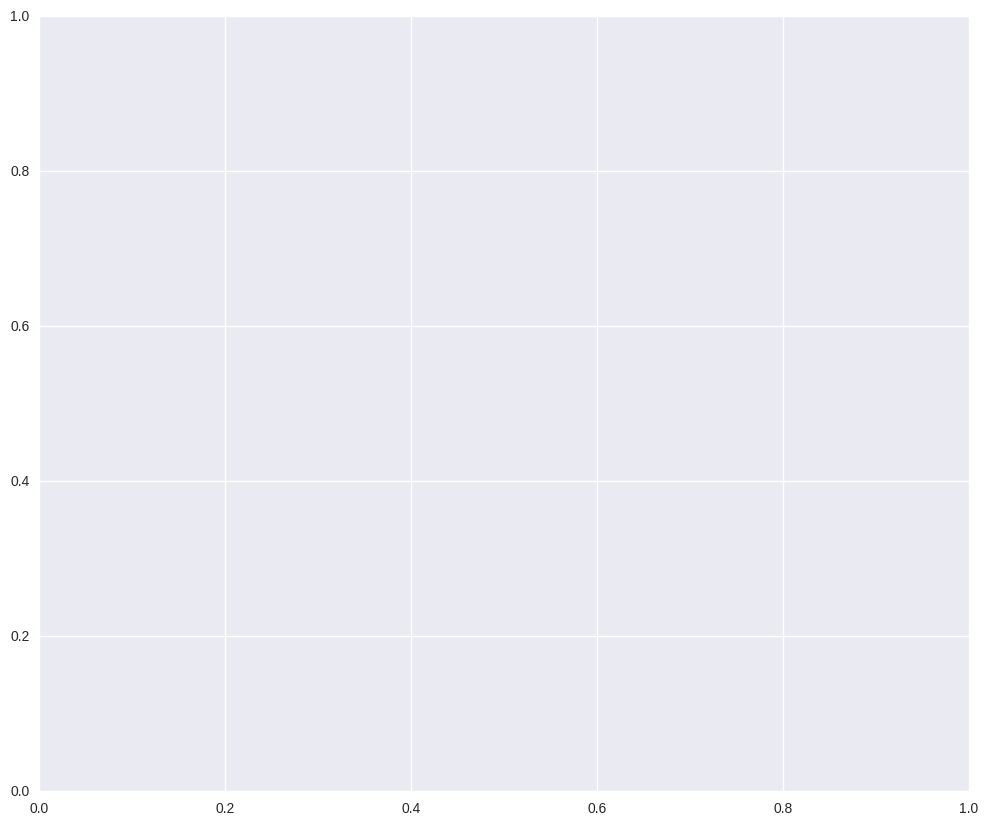

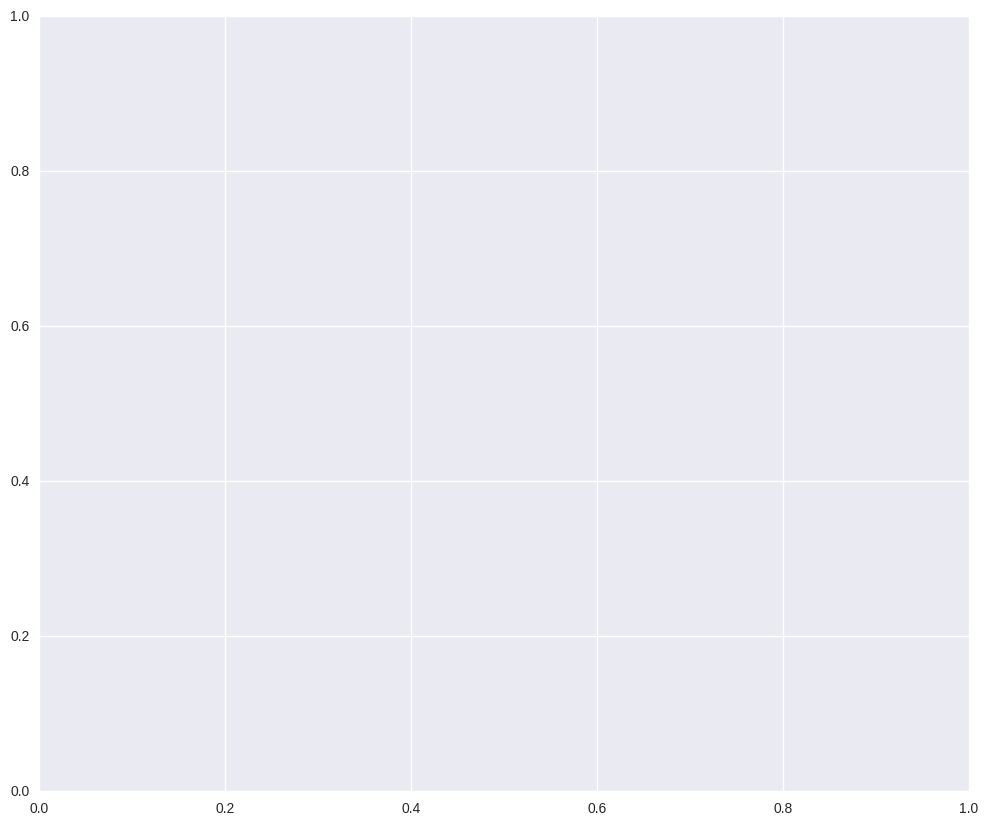

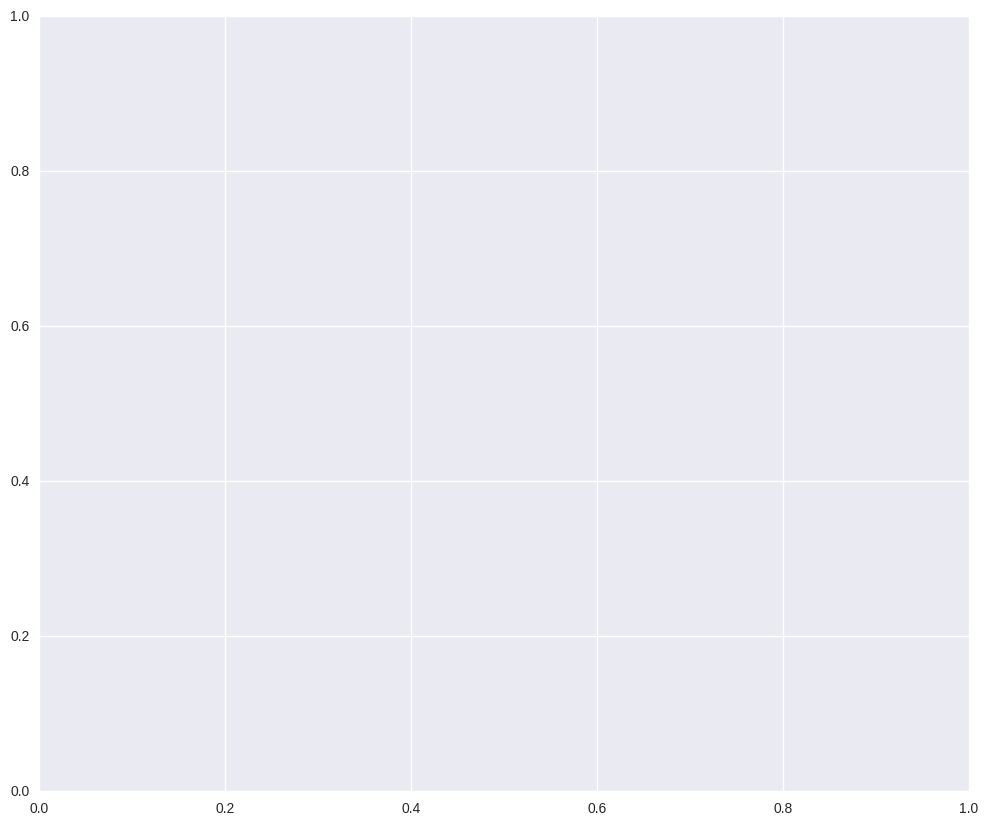

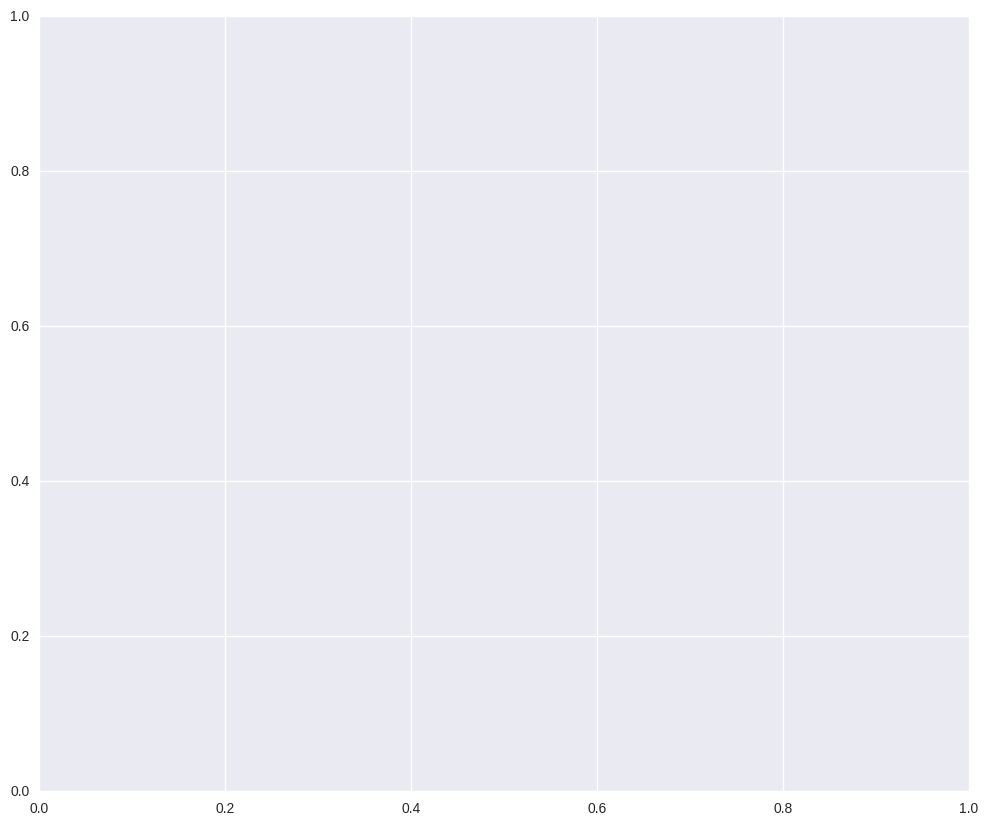

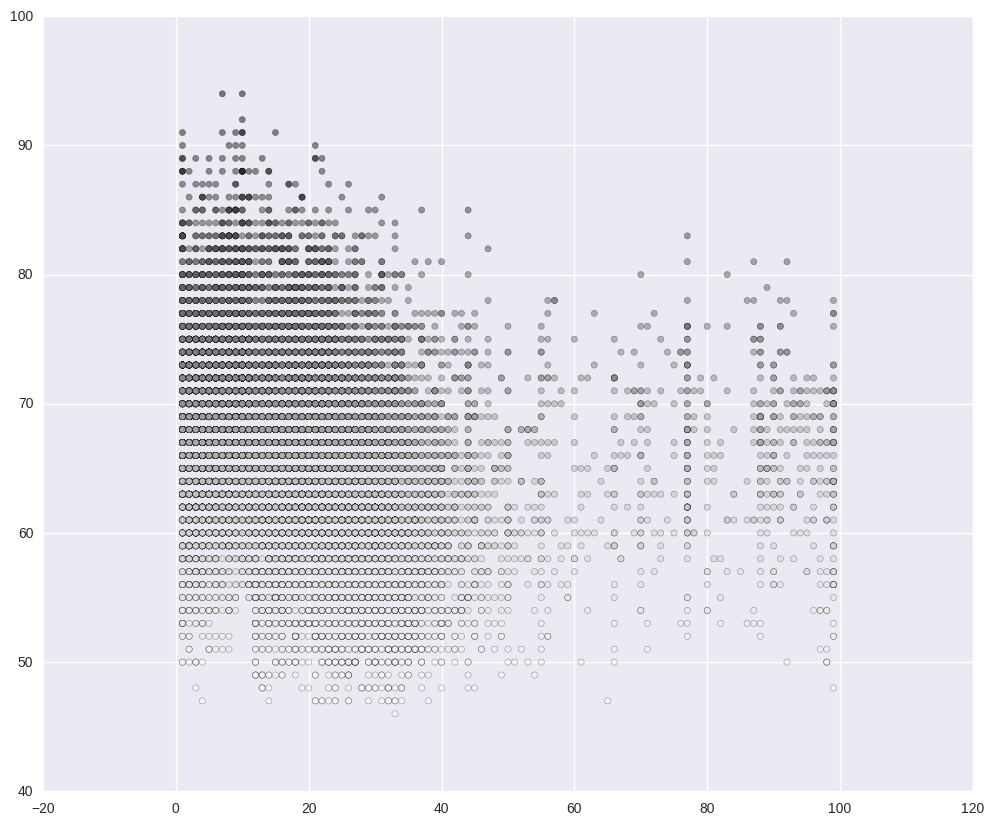

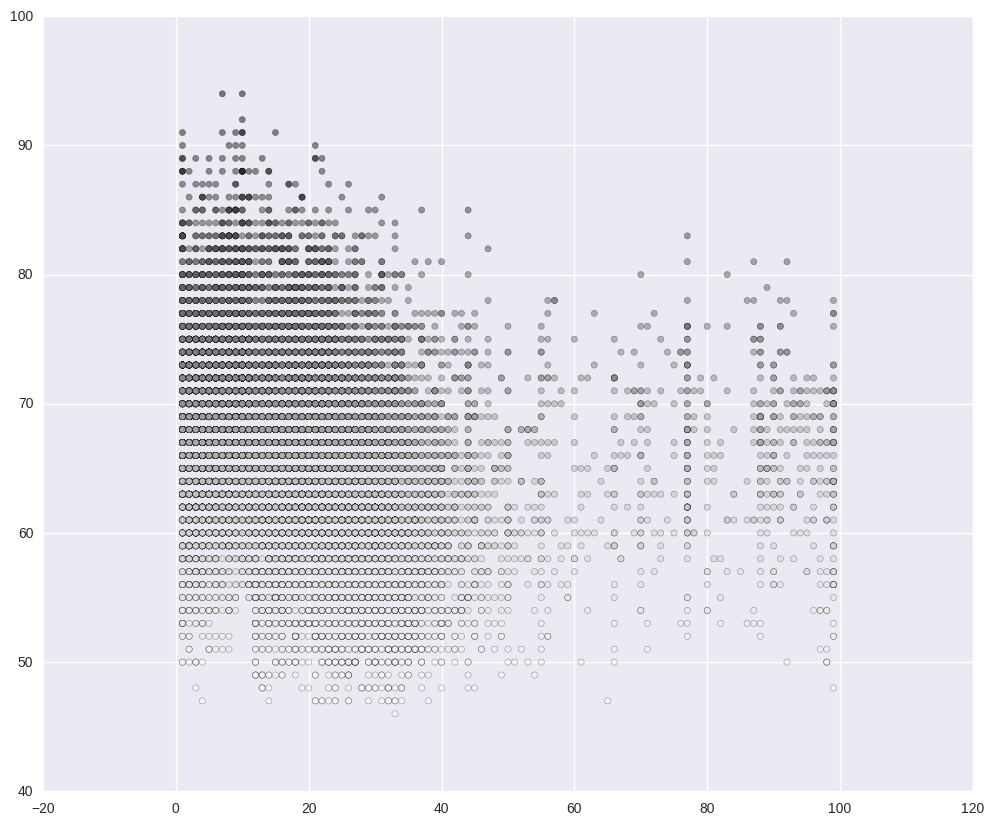

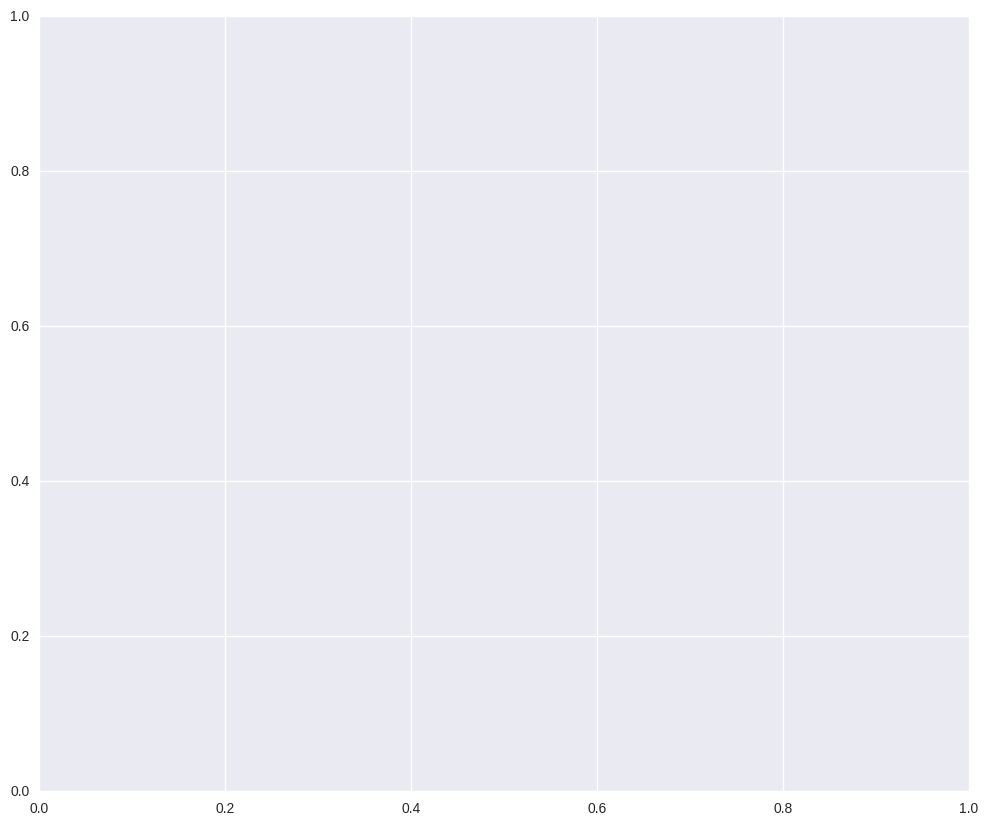

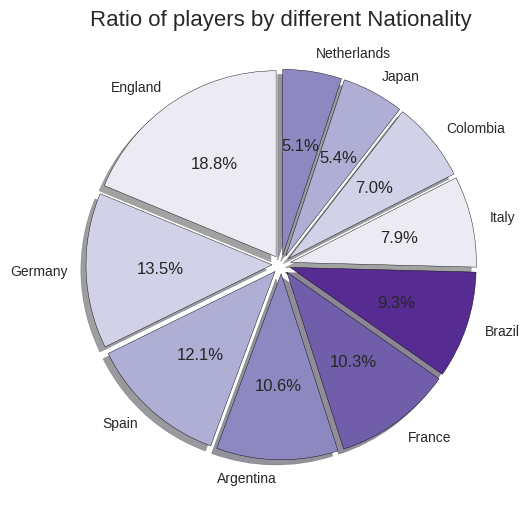

In [64]:
# Pie plot showing the overall ratio in the dataset
# Data to plot

England = len(datafr[datafr['Nationality'] == 'England'])
Germany = len(datafr[datafr['Nationality'] == 'Germany'])
Spain = len(datafr[datafr['Nationality'] == 'Spain'])
Argentina = len(datafr[datafr['Nationality'] == 'Argentina'])
France = len(datafr[datafr['Nationality'] == 'France'])
Brazil = len(datafr[datafr['Nationality'] == 'Brazil'])
Italy = len(datafr[datafr['Nationality'] == 'Italy'])
Colombia = len(datafr[datafr['Nationality'] == 'Colombia'])
Japan = len(datafr[datafr['Nationality'] == 'Japan'])
Netherlands = len(datafr[datafr['Nationality'] == 'Netherlands'])

labels = 'England','Germany','Spain','Argentina','France','Brazil','Italy','Colombia','Japan','Netherlands'
sizes = [England,Germany,Spain,Argentina,France,Brazil,Italy,Colombia,Japan,Netherlands]
plt.figure(figsize=(6,6))

# Plot
plt.pie(sizes, explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05), labels=labels, colors=sns.color_palette("Purples"),
autopct='%1.1f%%', shadow=True, startangle=90)
sns.set_context("paper", font_scale=1.2)
plt.title('Ratio of players by different Nationality', fontsize=16)
plt.show()

**In our given dataset, more than 50% of players come from popular countries like England, Germany, Spain, Argentina and France. This could be explained by the popularity and sizes of domestic leagues within these nations.**

In [65]:
smart_buy = datafr[(datafr['Contract Valid Until']=='2019') & (datafr['Overall']>=75)]
young_buy = smart_buy[smart_buy['Potential']>smart_buy['Overall']]
experience_buy = smart_buy[smart_buy['Age']>30]

In [66]:
plt.figure(figsize=(12,10))
ax = sns.scatterplot(x="Age", y="Potential", hue ="Overall", size="Overall", data=young_buy)
ax.set_title('Scatter plot of Age vs Potential for Smart Trade of Young players', fontsize=16)
sns.set_context("paper", font_scale=1.4)

AttributeError: 'module' object has no attribute 'scatterplot'

**From the above scatter plot, we get to know that there are few players that a club manager could pursue since their contract is running only till 2019 so either club managers could  negotiate less or directly negotiate with player in January transfer window. We might target those players represented by Purples dots in top left quadrant as their current Overall Rating and future Potential rating is high.**

In [67]:
plt.figure(figsize=(12,10))
ax = sns.scatterplot(x="Overall", y="Potential", hue ="Age", data=experience_buy)
ax.set_title('Scatter plot of Overall vs Potential for Experience Smart Trade', fontsize=16)
sns.set_context("paper", font_scale=1.4)

AttributeError: 'module' object has no attribute 'scatterplot'

**Drop unnecessary columns

In [68]:
## lets drop unnecessary columns
datafr.drop(['ID','Unnamed: 0','Weak Foot','Release Clause','Wage','Photo', 'Nationality', 'Flag', 'Club Logo', 'International Reputation', 'Body Type', 'Real Face','Jersey Number', 'Joined','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF',  'RW','LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM','CDM', 'RDM', 'RWB', 'LB', 'LCB','CB', 'RCB', 'RB'],
          axis=1,inplace=True)
datafr.shape
datafr.head()

,Name,Age,Overall,Potential,Club,Value,Special,Preferred Foot,Skill Moves,Work Rate,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,94,94,FC Barcelona,â¬110.5M,2202,Left,4.0,Medium/ Medium,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,94,94,Juventus,â¬77M,2228,Right,5.0,High/ Low,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,92,93,Paris Saint-Germain,â¬118.5M,2143,Right,5.0,High/ Medium,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,91,93,Manchester United,â¬72M,1471,Right,1.0,Medium/ Medium,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,91,92,Manchester City,â¬102M,2281,Right,4.0,High/ High,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


**C. Count of players by position & Distribution of players by overall

In [69]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(nrows=2, figsize=(16, 20))
sns.countplot(datafr['Position'], palette="RdPu", ax=axs[0])
axs[0].set_title('Number of players per position', fontsize=16)
sns.distplot(datafr['Overall'],color="Purple", ax=axs[1])
axs[1].set_title('Distribution of players by Overall', fontsize=16)

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


**D. Youth prospects with high potential growth
**Create a dataset for young prospects

In [70]:
youth_special = datafr[(datafr['Overall']>75) & (datafr['Potential'] - datafr['Overall']>=10)].sort_values(by='Overall',ascending=False)
cols = ['Name','Club','Age','Overall','Potential','Position','Value']
youth_special[cols]

,Name,Club,Age,Overall,Potential,Position,Value
229,G. Donnarumma,Milan,19,82,93,GK,â¬29M
415,H. Aouar,Olympique Lyonnais,20,80,90,LM,â¬23.5M
734,A. Lafont,Fiorentina,19,78,90,GK,â¬14M
735,T. Alexander-Arnold,Liverpool,19,78,88,RB,â¬14M
744,D. Calabria,Milan,21,78,88,RB,â¬14.5M
755,J. Gomez,Liverpool,21,78,88,CB,â¬14.5M
1143,VinÃ­cius JÃºnior,Real Madrid,17,77,92,LW,â¬17.5M
1172,N. Barella,Cagliari,21,77,89,RCM,â¬15.5M
1149,R. Bentancur,Juventus,21,77,89,RCM,â¬15.5M
1156,A. Diawara,Napoli,20,77,87,CM,â¬14M


In [71]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(nrows=2, figsize=(16, 20))
sns.countplot(youth_special['Position'], palette="PuRd", ax=axs[0])
axs[0].set_title('Number of young prospects per position', fontsize=16)
sns.distplot(youth_special['Overall'],color="Red", ax=axs[1])
axs[1].set_title('Distribution of young prospects by Overall', fontsize=16)

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


**E. Ratio of youth prospects by Position

In [72]:
youth_special['Position'].unique()

array(['GK', 'LM', 'RB', 'CB', 'LW', 'RCM', 'CM', 'LCB', 'RS', 'RM', 'ST',
       'CDM', 'LB', 'CAM'], dtype=object)

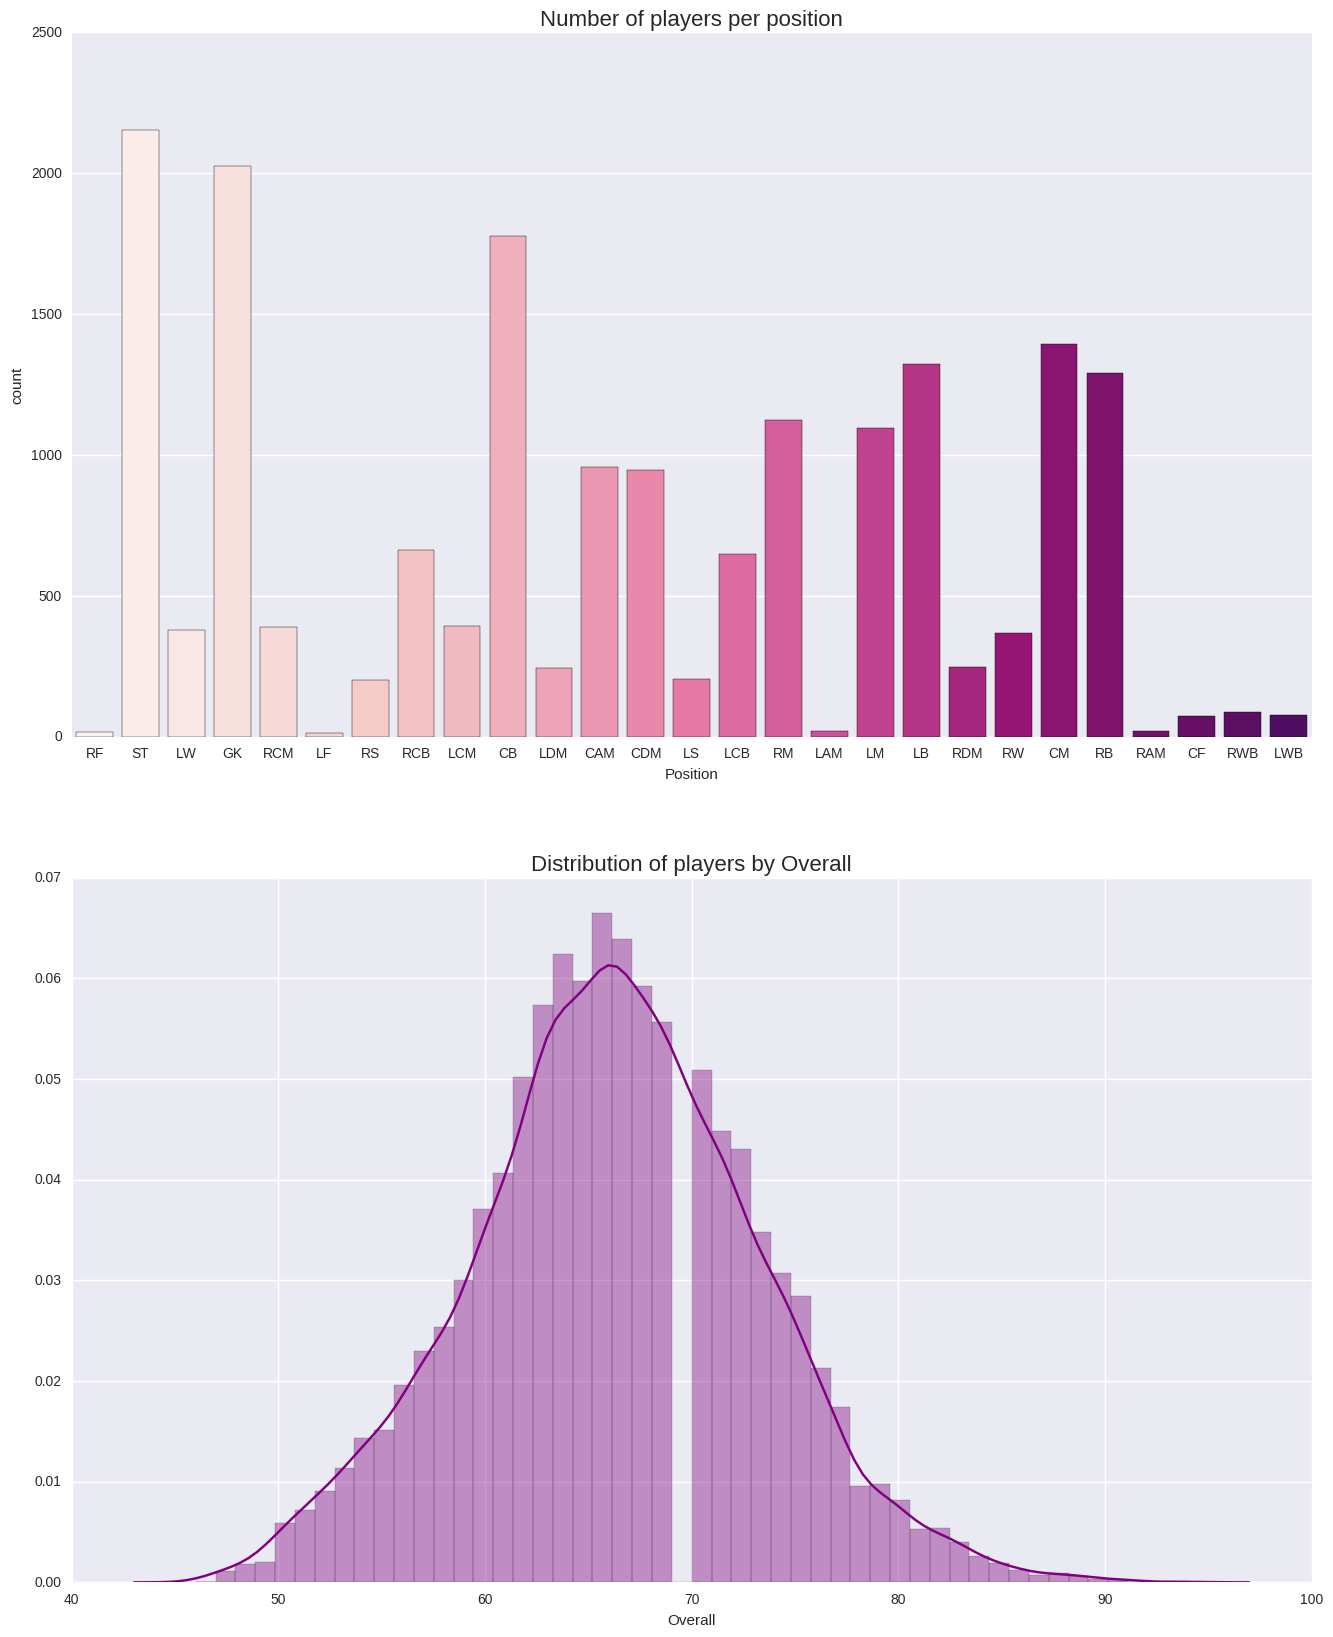

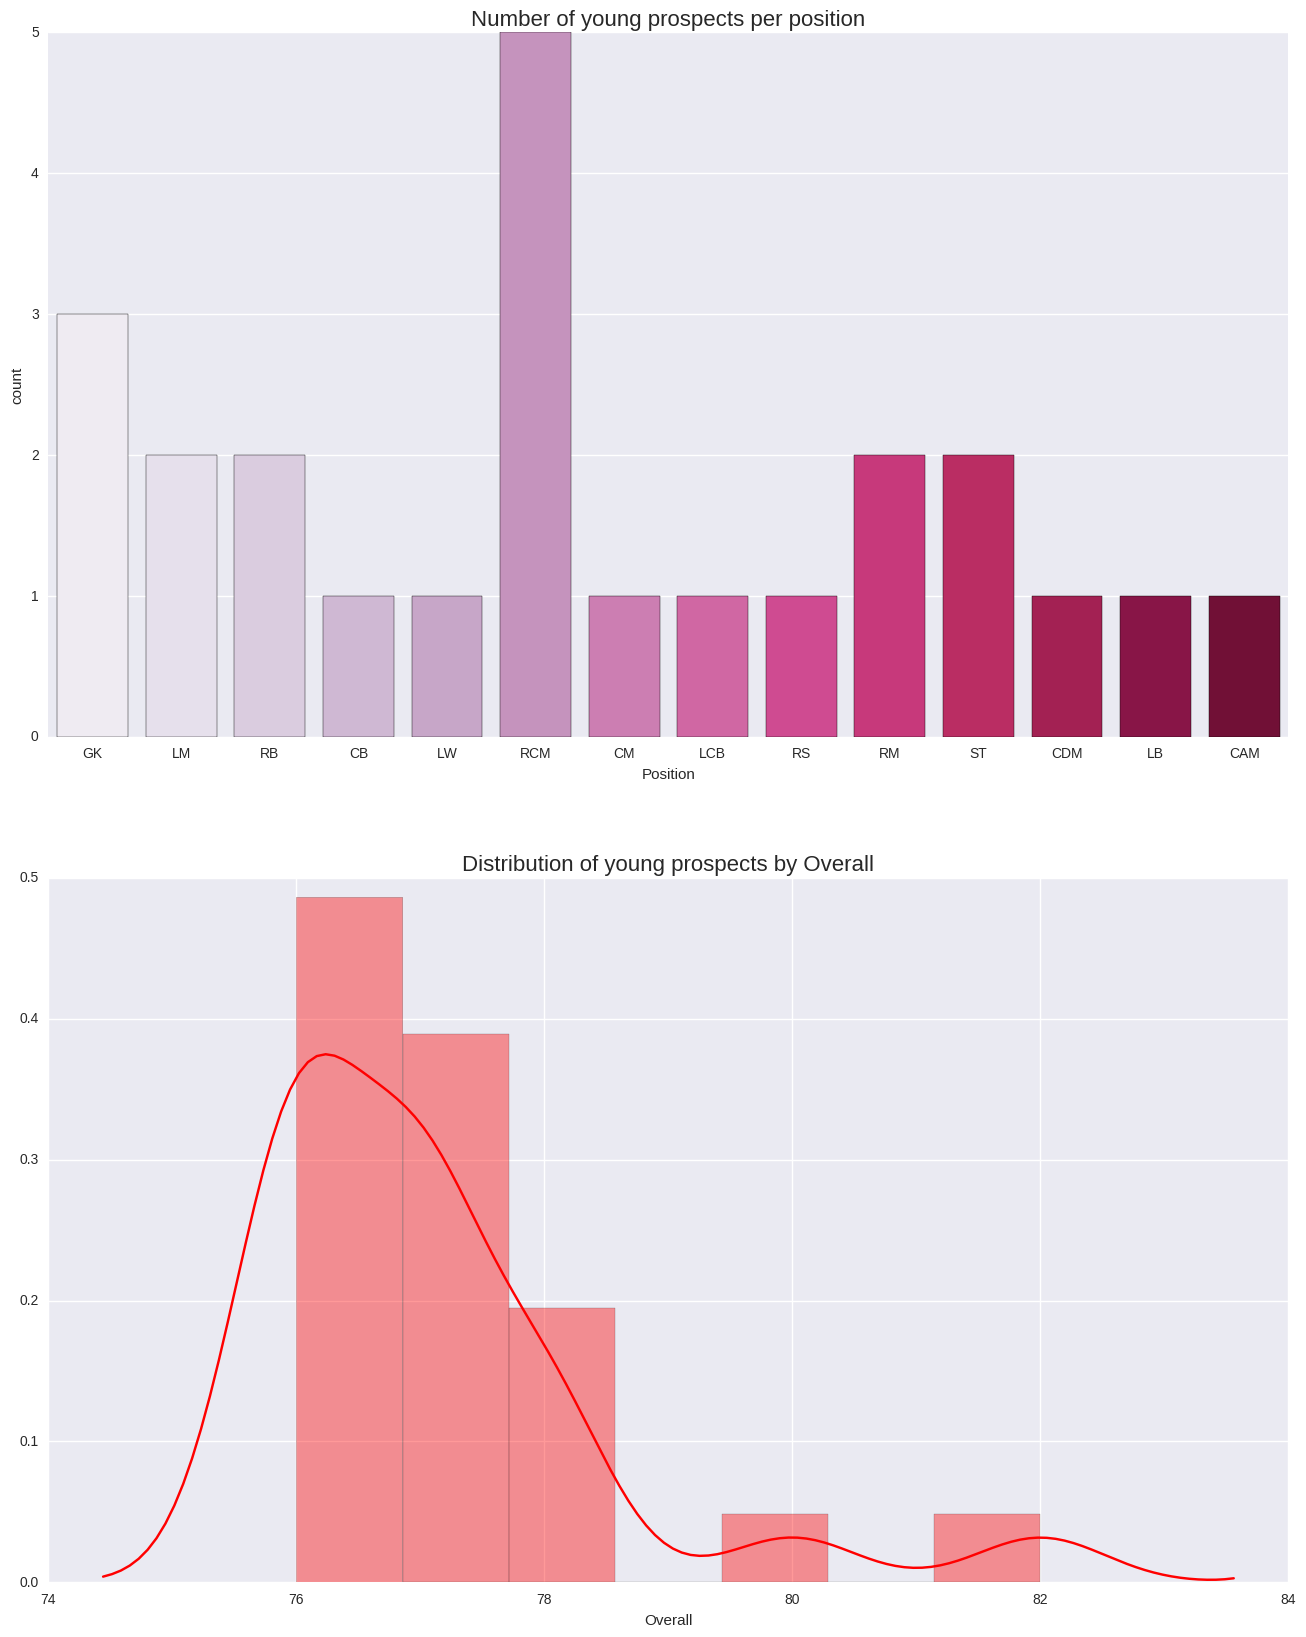

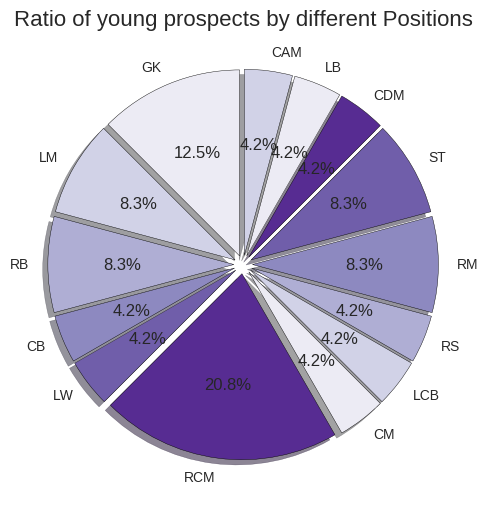

In [73]:
# Data to plot
GK = len(youth_special[youth_special['Position'] == 'GK'])
LM = len(youth_special[youth_special['Position'] == 'LM'])
RB = len(youth_special[youth_special['Position'] == 'RB'])
CB = len(youth_special[youth_special['Position'] == 'CB'])
LW = len(youth_special[youth_special['Position'] == 'LW'])
RCM = len(youth_special[youth_special['Position'] == 'RCM'])
CM = len(youth_special[youth_special['Position'] == 'CM'])
LCB = len(youth_special[youth_special['Position'] == 'LCB'])
RS = len(youth_special[youth_special['Position'] == 'RS'])
RM = len(youth_special[youth_special['Position'] == 'RM'])
ST = len(youth_special[youth_special['Position'] == 'ST'])
CDM = len(youth_special[youth_special['Position'] == 'CDM'])
LB = len(youth_special[youth_special['Position'] == 'LB'])
CAM = len(youth_special[youth_special['Position'] == 'CAM'])

labels = 'GK', 'LM', 'RB', 'CB', 'LW', 'RCM', 'CM', 'LCB', 'RS', 'RM', 'ST', 'CDM', 'LB', 'CAM'
sizes = [GK,LM,RB,CB,LW,RCM,CM,LCB,RS,RM,ST,CDM,LB,CAM]
plt.figure(figsize=(6,6))

# Plot
plt.pie(sizes, explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05), labels=labels, colors=sns.color_palette("Purples"),
autopct='%1.1f%%', shadow=True, startangle=90)
sns.set_context("paper", font_scale=1.2)
plt.title('Ratio of young prospects by different Positions', fontsize=16)
plt.show()

# 3. Predictions

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [75]:
datafr.columns

Index(['Name', 'Age', 'Overall', 'Potential', 'Club', 'Value', 'Special',
       'Preferred Foot', 'Skill Moves', 'Work Rate', 'Position',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

**Selecting columns to find similarity among players

In [76]:
attributes = datafr.iloc[:, 14:]
attributes['Skill Moves'] = datafr['Skill Moves']
attributes['Age'] = datafr['Age']
workrate = datafr['Work Rate'].str.get_dummies(sep='/ ')
attributes = pd.concat([attributes, workrate], axis=1)
df = attributes
attributes = attributes.dropna()
df['Name'] = datafr['Name']
df['Position'] = datafr['Position']
df = df.dropna()
print(attributes.columns)

Index(['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Skill Moves',
       'Age', 'High', 'Low', 'Medium'],
      dtype='object')


**Displaying our attribute set

In [77]:
attributes.head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Skill Moves,Age,High,Low,Medium
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,6.0,11.0,15.0,14.0,8.0,4.0,31,0,0,1
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,7.0,11.0,15.0,14.0,11.0,5.0,33,1,1,0
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,9.0,9.0,15.0,15.0,11.0,5.0,26,1,0,1
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,90.0,85.0,87.0,88.0,94.0,1.0,27,0,0,1
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,15.0,13.0,5.0,10.0,13.0,4.0,27,1,0,0


**Correlation Matrix based on attribute set

In [78]:
plt.figure(figsize=(9,9))

# Compute the correlation matrix
corr = attributes.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="RdBu", vmax=.3, center=0,
            square=True, linewidths=.7, cbar_kws={"shrink": .7})

**From the above correlation chart, we can see a lot of Goalkeepers attributes have a negative correlation with the attributes possessed by a Forward, Midfielder and Defender.**

**Standardize the dataset

In [79]:
scaled = StandardScaler()
X = scaled.fit_transform(attributes)

**Create recommendations using NearestNeighbors ML

In [80]:
recommendations = NearestNeighbors(n_neighbors=5,algorithm='kd_tree')
recommendations.fit(X)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

**Get Similar Players index

In [81]:
player_index = recommendations.kneighbors(X)[1]

In [82]:
player_index

array([[    0,     5,     2,    15,    68],
       [    1,   170,   124,   713,    17],
       [    2,     5,    65,    15,   157],
       ..., 
       [18156, 18015, 17154, 17994, 17968],
       [18157, 17868, 18071, 17493, 18041],
       [18158, 17869, 18042, 17888, 18086]])

**Define a recommend function to display results

In [83]:
def get_index(x):
    return df[df['Name']==x].index.tolist()[0]

def recommend_similar(player):
    print("These are 4 players similar to {} : ".format(player))
    index=  get_index(player)
    for i in player_index[index][1:]:
        print("Name: {0}\nPosition: {1}\n".format(df.iloc[i]['Name'],df.iloc[i]['Position']))

**Test 1 : Eden Hazard**

In [84]:
recommend_similar('E. Hazard')

These are 4 players similar to E. Hazard : 
Name: Neymar Jr
Position: LW

Name: P. Dybala
Position: LF

Name: Ronaldo Cabrais
Position: RW

Name: Douglas Costa
Position: LM



**Test 2 : Mohamed Salah**

In [85]:
recommend_similar(player='M. Salah')

These are 4 players similar to M. Salah : 
Name: S. ManÃ©
Position: LM

Name: Ronaldo Cabrais
Position: RW

Name: L. SanÃ©
Position: LW

Name: Alex Teixeira
Position: LS



**Test 3 : Manuel Neuer**

In [86]:
recommend_similar('M. Neuer')

These are 4 players similar to M. Neuer : 
Name: De Gea
Position: GK

Name: J. Pickford
Position: GK

Name: K. Schmeichel
Position: GK

Name: B. Leno
Position: GK



**Test 4: Joe Gomez (Young Prospect)**

In [87]:
recommend_similar('J. Gomez')

These are 4 players similar to J. Gomez : 
Name: N. Elvedi
Position: RCB

Name: M. Holgate
Position: CB

Name: O. Boscagli
Position: LB

Name: L. Klostermann
Position: RB

